# Calculate magnitude on Amy's data
20250330

Author: Kyoko Kusano

Distanceを変えた時にどう変化するか。

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

import os
import sys
from pathlib import Path

# フォルダパスを指定してsys.pathに追加
sys.path.append(str(Path(os.getcwd()).resolve().parent / "func"))

# 関数が格納されているモジュールをインポート
import amalysis as amalysis

In [2]:
raw_path = str(Path(os.getcwd()).resolve()) + '/data/Amy_dissimilarity.csv'
raw = pd.read_csv(raw_path, header=None).T
raw.index = ['word1'] + ['word2'] + list(range(1, raw.shape[0]-1))
raw = raw.rename(columns={0:'BDI'})
raw.loc['word2', 'BDI'] = np.nan
head = raw.iloc[:2, :].copy()

df_raw = raw.iloc[2:, :].copy()
df_raw = df_raw.sort_values('BDI', ignore_index=True)
df_raw = df_raw.drop('BDI', axis=1)
df_raw = df_raw # dissimilarity (make it similarity in exponential part)
df_raw = pd.concat([head, df_raw]).drop('BDI', axis=1).copy()
df_raw

,1,2,3,4,5,6,7,8,9,10,...,244,245,246,247,248,249,250,251,252,253
word1,brown,orange,red,black,green,red,envy,fear,pink,blue,...,blue,blue,fear,purple,disgust,calm,orange,green,brown,anxiety
word2,anger,anxiety,yellow,blue,calm,pink,joy,anger,green,anger,...,envy,anxiety,happiness,confidence,defeated,happiness,pink,disgust,joy,boredom
0,3,4,2,2,4,2,6,6,2,4,...,6,6,7,1,0,1,1,6,6,0
1,7,5,5,6,2,2,7,6,7,7,...,6,5,7,3,3,2,4,5,5,4
2,6,6,0,0,2,0,2,1,1,5,...,7,6,6,7,3,1,0,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,7,7,7,3,3,3,7,3,3,7,...,7,0,7,7,2,0,7,0,7,7
116,7,7,6,5,4,2,7,2,5,7,...,3,6,7,3,2,0,2,1,7,7
117,7,7,4,3,3,2,7,3,5,7,...,5,7,7,2,6,0,1,7,7,4
118,7,5,4,4,3,1,7,3,4,6,...,7,6,5,3,3,2,3,1,7,3


In [3]:
# all subjects average

unique_words = np.array(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black', 'happiness', 'joy', 'calm', 'confidence', 'envy', 'fear', 'anxiety', 'disgust', 'sadness', 'confusion', 'boredom', 'defeated', 'anger'])
df_dissim = amalysis.create_dissimilarity_matrix(df_raw, unique_words)

# each individual
unique_words = np.array(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black', 'happiness', 'joy', 'calm', 'confidence', 'envy', 'fear', 'anxiety', 'disgust', 'sadness', 'confusion', 'boredom', 'defeated', 'anger'])

df_dissim_allsub = []
for sub in range(len(df_raw.iloc[:,0])-2):
    df_dissim_temp = amalysis.create_dissimilarity_matrix(
        df_raw, unique_words, subjects_no=sub
    )
    df_dissim_allsub.append(df_dissim_temp)

In [4]:
# make exponential of similarity matrix to make it distance, "similarity matrix" in Leinster
# 

ratios = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 25, 50, 75, 100, 1000]
#subjects = [13, 37, 26, 40, 4, 11]
subjects = np.arange(0, 120)
magnitude_all = pd.DataFrame(np.nan, index=subjects, columns=ratios)
notfullrank_all = []
duplicate_all = []
unique_words = np.array(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black', 'happiness', 'joy', 'calm', 'confidence', 'envy', 'fear', 'anxiety', 'disgust', 'sadness', 'confusion', 'boredom', 'defeated', 'anger'])

for sub in subjects:
    print(f"Subject: {sub}")
    figpath_origin = str(Path(os.getcwd()).resolve()) + f'/fig/trace/{sub}'
    df_dist_all = []
    np_inv_all = []
    df_inv_all = []
    
    for idx, ratio in enumerate(ratios):
        print(f"SESSION {idx} ratio: {ratio}")

    
        df_dist = df_dissim_allsub[sub].copy()
    
        for i in range(len(df_dist)):
            for j in range(len(df_dist.iloc[0, :])):
                df_dist.iloc[i, j] = math.e ** (ratio * (-1) * df_dissim_allsub[sub].iloc[i, j]) # dissimilarity -> similarity
                
        df_dist_all.append(df_dist)
        
        # visualize df_dist
        if ratio == 0.001:
            ratio_st = "0001"
        elif ratio == 0.01:
            ratio_st = "001"
        elif ratio == 0.05:
            ratio_st = "005"
        elif ratio == 0.1:
            ratio_st = "01"
        elif ratio == 0.5:
            ratio_st = "05"
        else:
            ratio_st = ratio
            
        figpath_dist = figpath_origin + 'dist/' + f'Distance_ratio{ratio_st}, sub{sub}'
        #amalysis.plot_dissimilarity_heatmap(df_dist, annotation=False, mode_dissim=False, figpath=figpath_dist, save=True)

        df_inv, np_inv, fullrank, duplicates = amalysis.calc_inverse_matrix(df_dist, unique_words)
        if fullrank == False:
            notfullrank_all.append([sub, ratio])
            duplicate_all.append([sub, ratio, duplicates])
            print(f"subject {sub}: compressed to calc inverse matrix")
            print(f"duplicated index: {duplicates}")
        df_inv_all.append(df_inv)
        np_inv_all.append(np_inv)
        figpath_inv = figpath_origin + 'inv/' + f"Inverse_matrix_ratio{ratio_st}, sub{sub}"
        #amalysis.plot_dissimilarity_heatmap(df_inv, annotation=False, mode_dissim=False, figpath=figpath_inv, save=True)
        
        # calculate magnitude of M
        magnitude = np.sum(np_inv)
        magnitude_all.loc[sub, ratio] = magnitude

Subject: 0
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Matrix is singular. Dropping duplicated rows.
Matrix still singular after duplicate removal. Using pinv.
subject 0: compressed to calc inverse matrix
duplicated index: []
Subject: 1
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Subject: 2
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Matrix is singular. Dropping duplicated rows.
subject 36: compressed to calc inverse matrix
duplicated index: ['red', 'happiness', 'joy', 'anger']
Subject: 37
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Matrix is singular. Dropping duplicated rows.
Matrix still singular after duplicate removal. Using pinv.
subject 37: compressed to calc inverse matrix
duplicated index: ['grey', 'black', 'happiness', 'joy', 'disgust', 'defeated']
Subject: 38
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 r

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Matrix is singular. Dropping duplicated rows.
Matrix still singular after duplicate removal. Using pinv.
subject 88: compressed to calc inverse matrix
duplicated index: ['happiness', 'joy']
Subject: 89
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Matrix is singular. Dropping duplicated rows.
subject 89: compressed to calc inverse matrix
duplicated index: ['happiness', 'confidence']
Subject: 90
SESSION 0 ratio: 0.001
SESSION 1 ratio: 0.01
SESSION 2 ratio: 0.05
SESSION 3 ratio: 0.1
SESSION 4 ratio: 0.5
SESSION 5 ratio: 1
SESSION 6 ratio: 5
SESSION 7 ratio: 10
SESSION 8 ratio: 25
SESSION 9 ratio: 50
SESSION 10 ratio: 75
SESSION 11 ratio: 100
SESSION 12 ratio: 1000
Subject: 91
SESSION 0 ratio: 0.001
S

In [5]:
notfullrank_all

[[0, 1000],
 [2, 1000],
 [4, 0.001],
 [4, 0.01],
 [4, 0.05],
 [4, 0.1],
 [4, 0.5],
 [4, 1],
 [4, 5],
 [4, 10],
 [4, 25],
 [4, 50],
 [4, 75],
 [4, 100],
 [4, 1000],
 [5, 1000],
 [6, 1000],
 [7, 1000],
 [8, 1000],
 [9, 1000],
 [10, 1000],
 [11, 0.001],
 [11, 0.01],
 [11, 0.05],
 [11, 0.1],
 [11, 0.5],
 [11, 1],
 [11, 5],
 [11, 10],
 [11, 25],
 [11, 50],
 [11, 75],
 [11, 100],
 [11, 1000],
 [12, 1000],
 [13, 1000],
 [14, 10],
 [14, 25],
 [14, 50],
 [14, 75],
 [14, 100],
 [14, 1000],
 [15, 0.001],
 [15, 0.01],
 [15, 0.05],
 [15, 0.1],
 [15, 0.5],
 [15, 1],
 [15, 5],
 [15, 10],
 [15, 25],
 [15, 50],
 [15, 75],
 [15, 100],
 [15, 1000],
 [16, 1000],
 [17, 1000],
 [18, 1000],
 [19, 1000],
 [21, 1000],
 [22, 1000],
 [23, 1000],
 [24, 1000],
 [25, 1000],
 [27, 1000],
 [28, 50],
 [28, 75],
 [28, 100],
 [28, 1000],
 [30, 1000],
 [31, 1000],
 [32, 1000],
 [33, 1000],
 [35, 1000],
 [36, 1000],
 [37, 1000],
 [38, 1000],
 [39, 1000],
 [40, 1000],
 [42, 1000],
 [43, 1000],
 [44, 1000],
 [45, 1000],
 [4

In [6]:
# 有効数字3桁に変換（数値のみ処理）
def format_if_number(x):
    # 数値のみ有効数字3桁に変換
    if isinstance(x, (int, float)):
        return "{:.5g}".format(x)
    return x

magnitude_all_transform = magnitude_all.map(format_if_number)
magnitude_all_transform.reset_index(drop=True, inplace=True)
magnitude_all_transform.to_csv('magnitudes_trace_allsub.csv', index=False, header=True, na_rep="NaN")

print("saved to csv successfully")

saved to csv successfully


In [7]:
magnitude_all

,0.001,0.010,0.050,0.100,0.500,1.000,5.000,10.000,25.000,50.000,75.000,100.000,1000.000
0,1.003566,1.035934,1.185612,1.382183,3.553890,7.639422,11.896511,11.999285,1.199998e+01,-2.475880e+27,2.220446e-16,0.000000e+00,12.0
1,1.004452,1.044835,1.249593,1.484303,8.151278,11.190362,16.932417,16.999546,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.0
2,1.004896,1.049799,1.267874,1.583122,5.663869,7.568761,9.959661,9.999728,5.242880e+05,0.000000e+00,0.000000e+00,0.000000e+00,12.0
3,1.004434,1.044868,1.235024,1.511907,4.382867,9.085361,15.944733,15.999637,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,16.0
4,1.002838,1.028522,1.145372,1.296035,2.402462,4.193923,9.761380,9.998366,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.008142,1.064172,1.310371,1.615295,6.020502,13.368566,10.989876,-32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11.0
116,1.003781,1.037609,1.175050,1.103281,3.969578,6.156243,10.397213,10.466206,7.864320e+05,-3.713820e+27,-3.507604e+49,5.245327e+71,11.0
117,1.003754,1.035477,1.196349,1.203519,161.782631,9.488960,14.934783,14.999569,-1.282561e+06,5.184706e+21,3.733242e+32,2.688117e+43,16.0
118,1.004661,1.047169,1.247436,1.509459,5.396087,19.242220,14.569522,14.666011,7.776977e+21,-8.526422e+39,2.338403e+49,0.000000e+00,18.0


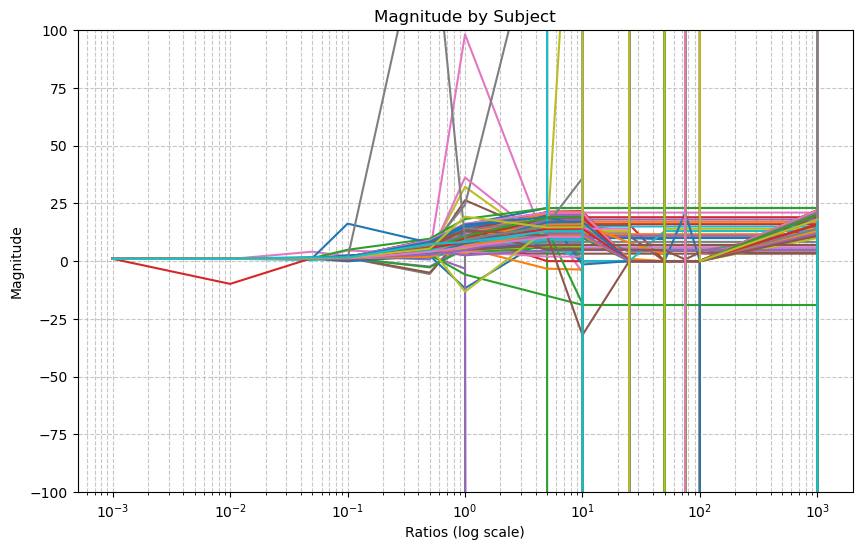

In [8]:
# 折れ線グラフの作成
plt.figure(figsize=(10, 6))

# 各インデックス (subject) ごとにプロット
for subject in magnitude_all.index:
    plt.plot(magnitude_all.columns, magnitude_all.loc[subject], label=f'Subject {subject}')

# 軸の設定
plt.xscale('log')  # 横軸を対数軸に
plt.xlabel('Ratios (log scale)')
plt.ylabel('Magnitude')

# 縦軸のリミットを自動的にいい感じに設定
y_min, y_max = np.nanmin(magnitude_all.values), np.nanmax(magnitude_all.values)
plt.ylim(-100, 100)

# タイトルと凡例
plt.title('Magnitude by Subject')
#plt.legend(title='Subjects')

# グリッドの表示
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.savefig('./fig/lineplot_magnitude_allsub.png', dpi=300)
# グラフの表示
plt.show()



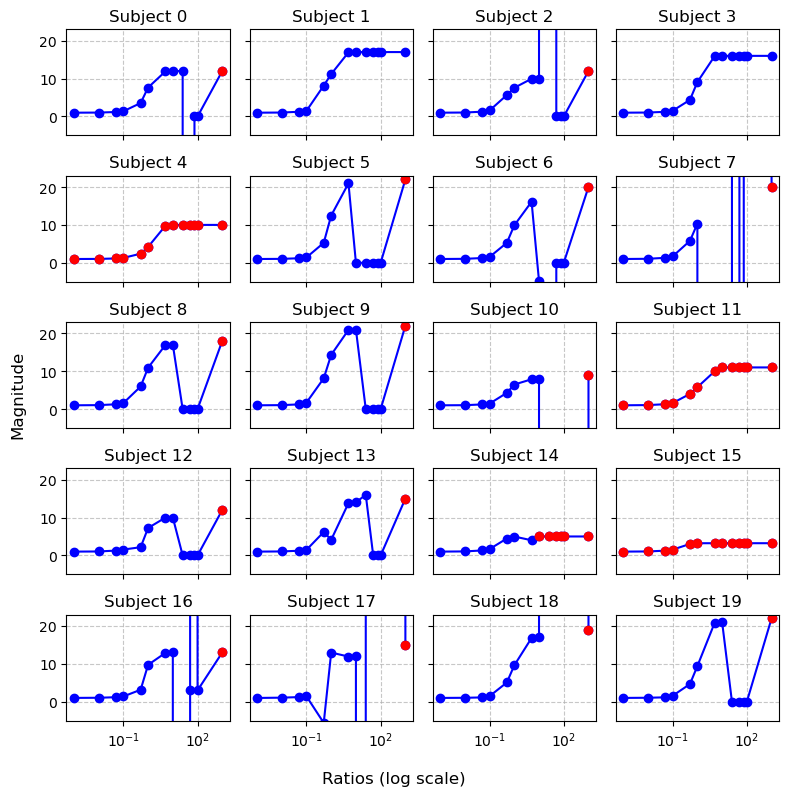

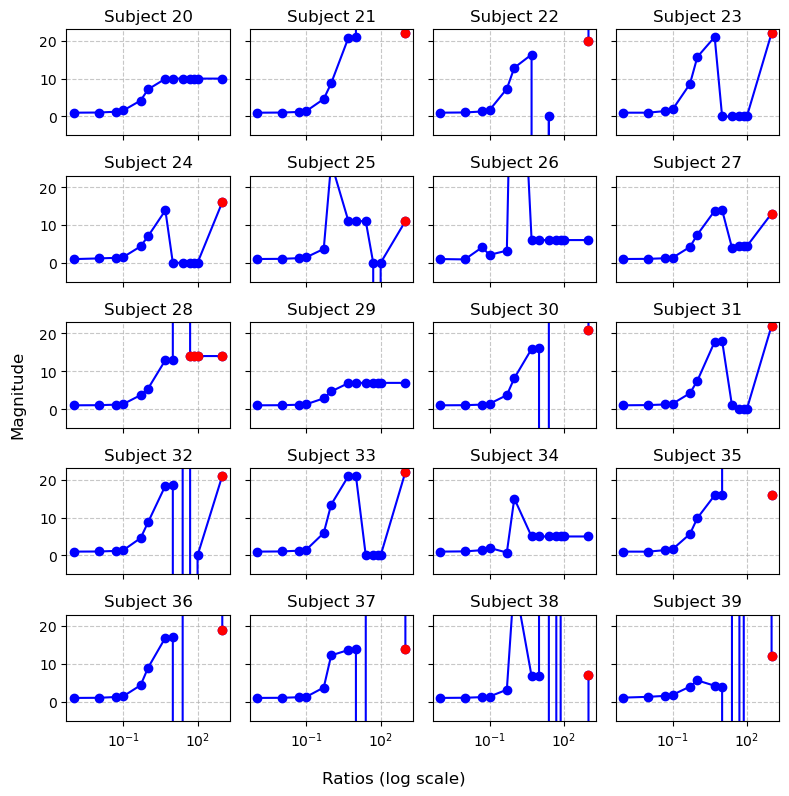

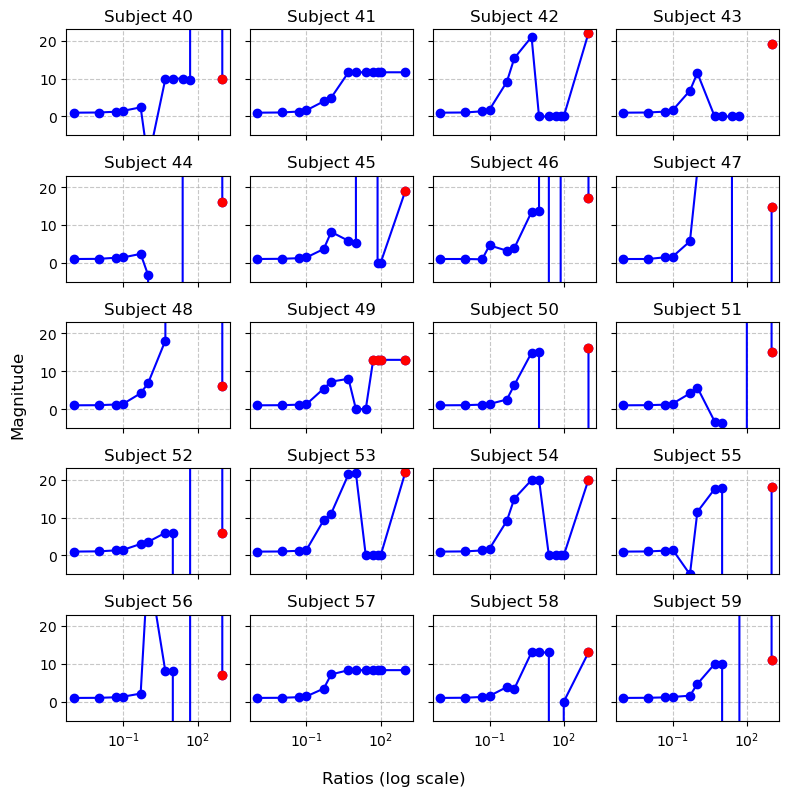

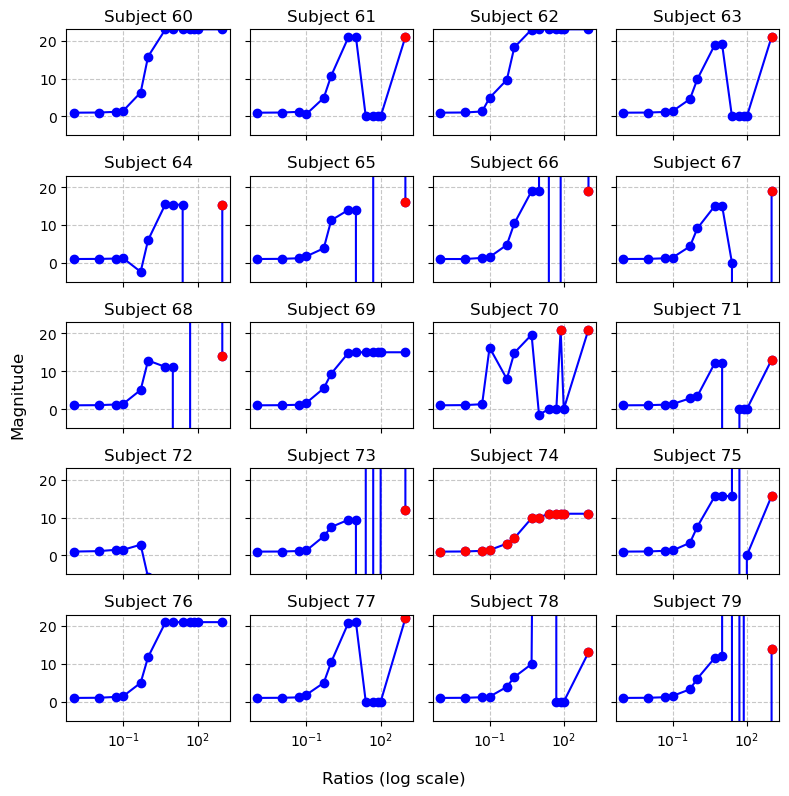

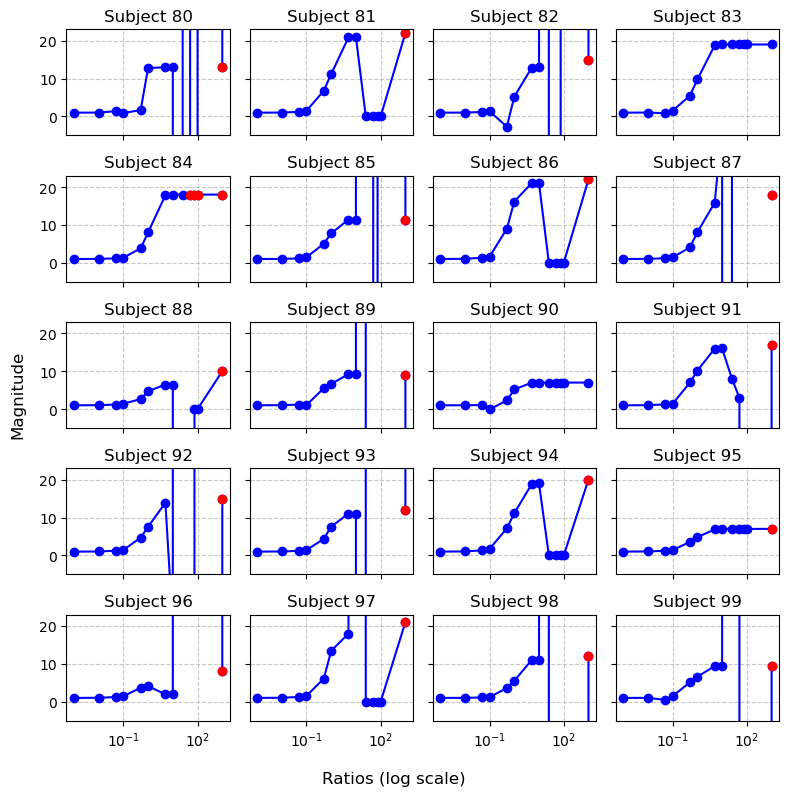

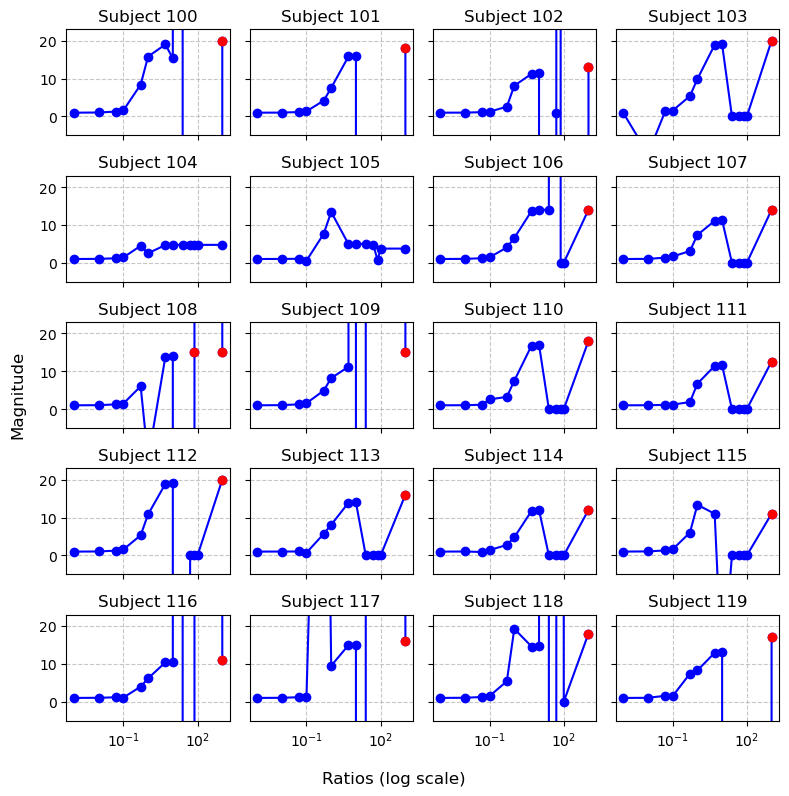

In [16]:
# membership check を高速化するため、set に変換（subjectは int、ratio は float）
notfullrank_set = set((int(item[0]), float(item[1])) for item in notfullrank_all)

# 図面の個数（breakdown）とサブプロットレイアウトの設定
breakdown = 6  # 作成する図面の数
subjects_per_fig = int(np.ceil(n_subjects / breakdown))
n_cols = 4
n_rows = int(np.ceil(subjects_per_fig / n_cols))

# 各図面ごとにプロット
for ind in range(breakdown):
    # 対象となる subject のインデックス範囲
    indexrange_start = ind * subjects_per_fig
    indexrange_end = min((ind + 1) * subjects_per_fig, n_subjects)
    
    # 図とサブプロットの作成
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 8), sharex=True, sharey=True)
    # 2次元配列の場合は flatten して 1次元リストにする
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # 各 subject のプロット
    for i, subject in enumerate(range(indexrange_start, indexrange_end)):
        ax = axes[i]
        # x軸：列（ratios）、y軸：各 subject の値
        x_vals = np.array(magnitude_all.columns, dtype=float)
        y_vals = magnitude_all.loc[subject].values
        
        # 通常点と「not full rank」と判定された点を分ける
        x_default, y_default = [], []
        x_special, y_special = [], []
        for ratio, y_val in zip(x_vals, y_vals):
            # (subject, ratio) が notfullrank_set に含まれていれば特別表示
            if (subject, ratio) in notfullrank_set:
                x_special.append(ratio)
                y_special.append(y_val)
            else:
                x_default.append(ratio)
                y_default.append(y_val)
        
        # 通常点を青で線（必要なら marker='o' も指定）
        ax.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue', label=f'Subject {subject}')
        # 特別な点があれば赤い点として上書き（線は描画せず、マーカーのみ）
        if x_special:
            ax.plot(x_special, y_special, marker='o', linestyle='', color='red', label='Not Full Rank')
        
        # x軸を対数軸に設定し、10の階乗の目盛りを指定
        ax.set_xscale('log')
        ax.xaxis.set_major_locator(LogLocator(base=10.0))
        ax.set_title(f'Subject {subject}')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.set_ylim(-5, 23)
    
    # 使われていない余分なサブプロットを削除
    for j in range(indexrange_end - indexrange_start, len(axes)):
        fig.delaxes(axes[j])
    
    # 共通の軸ラベルを設定
    fig.supxlabel('Ratios (log scale)')
    fig.supylabel('Magnitude')
    plt.tight_layout()
    plt.savefig(f'./fig/lineplot_magnitude_eachsub{ind}.png', dpi=300)
    plt.show()
